In [2]:
import sys


sys.path.append('..')
from src.models.lstm_model import LSTMPredictionModel

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import logging
from src.data import load_data
from src import config
from src.preprocessing.dataset import generate_dataset

In [5]:
logging.basicConfig(level=logging.INFO)
model = LSTMPredictionModel(
    epochs=50,
    batch_size=1024,
)

INFO:LSTMPredictionModel:Init...


In [6]:
PERIOD = 96

shift_value = 1 * PERIOD
year = 2019
loc_x = 200
loc_y = 200

max_values = 40 * PERIOD
x_train, y_train = generate_dataset(
    load_data(data_path=config.DATA_FOLDER, year=year)[:max_values, loc_x, loc_y], shift=shift_value
)
x_val, y_val = generate_dataset(
    load_data(data_path=config.DATA_FOLDER, year=year-1)[:max_values, loc_x, loc_y], shift=shift_value
)
x_test, y_test = generate_dataset(
    load_data(data_path=config.DATA_FOLDER, year=year-2)[:max_values, loc_x, loc_y], shift=shift_value
)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

INFO:root:Computing the difference...
INFO:root:Computing the difference...
INFO:root:Computing the difference...


(3903, 96) (3903,)
(3903, 96) (3903,)
(3903, 96) (3903,)


INFO:LSTMPredictionModel:Fitting the model...


Epoch 1/50
4/4 - 13s - loss: 0.0010 - val_loss: 8.2332e-04 - 13s/epoch - 3s/step
Epoch 2/50
4/4 - 1s - loss: 9.9107e-04 - val_loss: 7.8824e-04 - 676ms/epoch - 169ms/step
Epoch 3/50
4/4 - 1s - loss: 9.5761e-04 - val_loss: 7.5514e-04 - 678ms/epoch - 170ms/step
Epoch 4/50
4/4 - 1s - loss: 9.3527e-04 - val_loss: 7.2138e-04 - 678ms/epoch - 169ms/step
Epoch 5/50
4/4 - 1s - loss: 9.1086e-04 - val_loss: 6.9182e-04 - 655ms/epoch - 164ms/step
Epoch 6/50
4/4 - 1s - loss: 8.9670e-04 - val_loss: 6.6622e-04 - 675ms/epoch - 169ms/step
Epoch 7/50
4/4 - 1s - loss: 8.7428e-04 - val_loss: 6.4409e-04 - 667ms/epoch - 167ms/step
Epoch 8/50
4/4 - 1s - loss: 8.5126e-04 - val_loss: 6.2363e-04 - 666ms/epoch - 166ms/step
Epoch 9/50
4/4 - 1s - loss: 8.3982e-04 - val_loss: 6.1477e-04 - 680ms/epoch - 170ms/step
Epoch 10/50
4/4 - 1s - loss: 8.3780e-04 - val_loss: 6.1361e-04 - 691ms/epoch - 173ms/step
Epoch 11/50
4/4 - 1s - loss: 8.3748e-04 - val_loss: 6.1130e-04 - 699ms/epoch - 175ms/step
Epoch 12/50
4/4 - 1s - loss

INFO:LSTMPredictionModel:Model fitted.


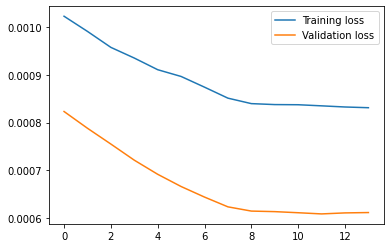

INFO:LSTMPredictionModel:Model fit.


In [7]:
model.fit(
    X_train=x_train,
    y_train=y_train,
    X_val=x_val,
    y_val=y_val,
    plot_history=True,
    verbose=
)

In [8]:
# Check if we can predict
x = x_test[0]
print(x.shape)

(96,)


In [10]:
x_test[0].shape
x_final = model.predict(x_test[0], how_many=PERIOD*3, verbose=True)

100%|██████████| 288/288 [00:40<00:00,  7.05it/s]


In [11]:
x_final.shape

(384,)

<Figure size 432x288 with 0 Axes>

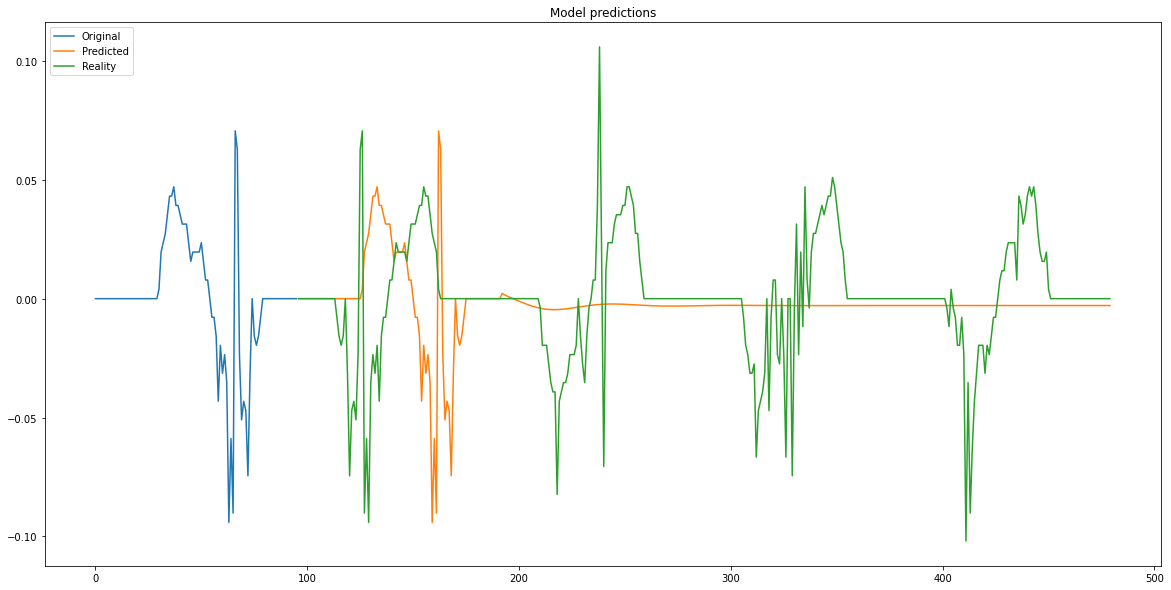

In [12]:
import matplotlib.pyplot as plt

first_values = list(range(0, len(x_test[0])))
pred_values = list(range(len(x_test[0]), len(x_test[0]) + len(x_final)))
# TODO: check if correct, and not displaying the initial values
plt.clf()
plt.figure(figsize=(20,10))
plt.plot(first_values, x_test[0], label="Original")
plt.plot(pred_values, x_final, label="Predicted")
plt.plot(pred_values, y_test[: x_final.shape[0]], label="Reality")
plt.legend(loc="upper left")
plt.title("Model predictions")
plt.show();


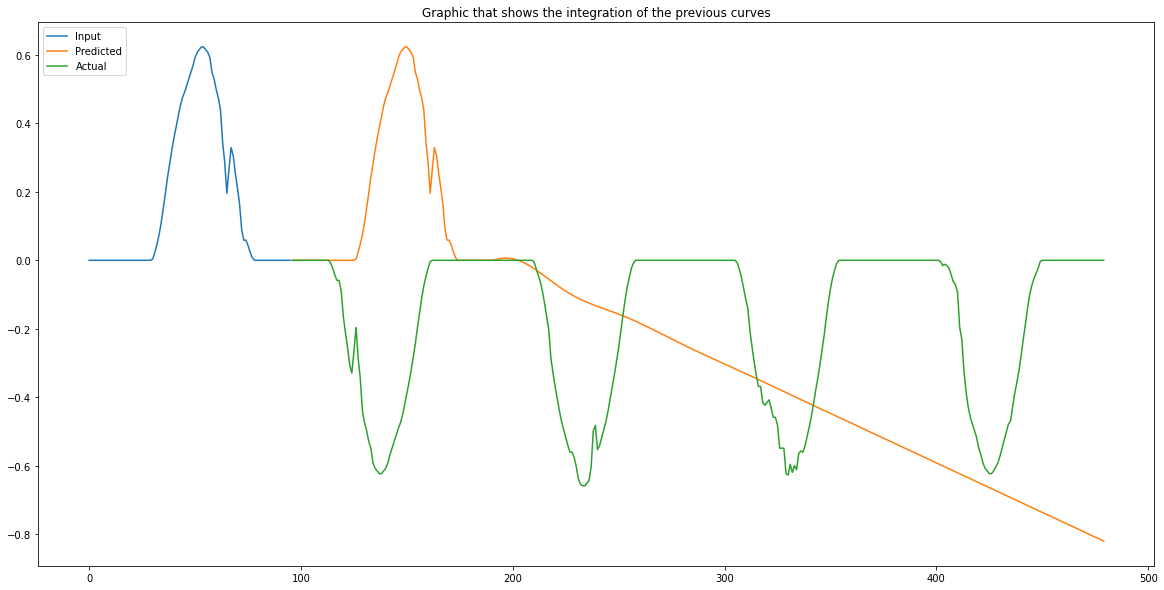

In [13]:
import numpy as np

plt.figure(figsize=(20,10))
input_cumsum = np.cumsum(x_test[0])
plt.plot(first_values, input_cumsum, label="Input")
plt.plot(pred_values, input_cumsum[-1]+np.cumsum(x_final), label="Predicted")
plt.plot(pred_values, input_cumsum[-1]+np.cumsum(y_test[:x_final.shape[0]]), label="Actual")
plt.legend(loc="upper left")
plt.title("Graphic that shows the integration of the previous curves")
plt.show()
